# 회귀계수 축소법

### 분석용 데이터의 이상적 조건
- 독립변수 X 사이에 상관성이 작아야 이상적임.
- 반면에 독립변수 X와 종속변수 Y의 상관성은 커야 함.
- 위 두 성질을 만족하는 소수의 독립변수 집합
- 많은 양질의 데이터(결측치와 노이즈가 없는 깨끗한 데이터)

### 변수선택
- 독립변수 X 간에는 상관성이 적고, X와 종속변수 Y 간에는 상관성이 큰 독립변수만을 추출
    > 사람의 키를 예측하는 데 있어서 다리길이와 팔길이는 중복성 존재

- 즉, Y의 변동성(분산)을 잘 설명하면서 X들끼리는 상관관계가 없는 변수들이 좋은 변수임.

### 회귀계수를 축소하는 이유
- 영향력이 없는 입력 변수의 계수를 0에 가깝게 가져간다면, 모형에 포함되는 입력 변수의 수를 줄일 수 있음.
- 입력 변수의 수를 줄일 때의 장점
    - 1) 잡음(noise)을 제거해 모형의 정확도를 개선
    - 2) 모형의 연산속도가 빨라짐
    - 3) 다중공산성의 문제를 완화시켜 모형의 해석 능력을 향상

### 계수축소법의 종류
- 계수축소법은 기본적으로 다중선형회귀와 유사
- 다중선형회귀에서 잔차를 최소화했다면, 계수축소법에서는 잔차와 회귀계수를 최소화.
- 계수축소법에는 Ridge 회귀 / Lasso 회귀 / Elastic-Net 회귀

### Ridge 회귀
- f(베타)에 회귀계수의 제곱의 합을 대입
- tuning parameter는 크면 클 수록 보다 많은 회귀계수를 0으로 수렴
    > minimize (SSE + lambda)
<br>

- 다중공선성은 X들 간의 강한 선형관계가 있을 때 발생
- X'X의 역행렬을 구할 수가 없음.
- Ridge는 X'X의 역행렬을 구할 수 있도록 강제로 작은 값을 diagonal term에 추가한 것.
     > diagonal term : 행렬의 가운데
            

### Lasso
- f(베타)에 회귀계수의 절대값의 합을 대입
- Lasso의 베타는 절댓값의 형태를 가지고 있어서 ridge와 다르게 한 번에 구할 수 없음.
    > Logistic 회귀처럼 조금씩 업데이트 하면서 찾아야함.

- 람다 값의 설정
    > 람다 값을 변화시켜가며 MSE가 최소일 때의 람다를 탐색

### Ridge 와 Lasso의 차이점
- Ridge는 계수를 축소하되 0에 가까운 수로 축소하는 반면, Lasso는 계수를 완전히 0으로 축소.
        > 여기서 계수는 베타를 뜻함.
- Ridge : 입력변수들이 전반적으로 비슷한 수준으로 출력 변수에 영향을 미치는 경우에 사용
- Lasso : 출력 변수에 미치는 입력 변수의 영향력 편차가 큰 경우에 사용.

### Elastic-Net 회귀
- Lasso 와 Ridge 회귀의 하이브리드(정규화) 회귀 모델
- Lasso에 적용된 회귀계수의 절대값의 합과 Ridge에 적용된 회귀계수의 제곱의 합을 모두 f(베타)에 대입
<br>
- 람다1, 람다2는 Ridge와 Lasso 속성에 대한 강도를 조절
- Lasso 변수 축소 효과로 sparse model 생성
- Ridge의 정규화 속성으로 변수의 grouping effect 유도 및 Lasso의 sparsity를 안정화
    > grouping effect : Lasso는 상관관계가 있는 다수의 변수들 중 하나를 무작위로 선택하여 계수를 축소하는 반면, elastic-net은 상관성이 높은 다수의 변수들을 모두 선택(또는 제거)
- 따라서, 다수의 변수 간에 상관관계가 존재할 때 효과적.

# Lasso, Ridge 실습

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time

In [36]:
ploan = pd.read_csv('./data/Personal_loan.csv')
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [37]:
# 의미없는 변수 제거
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)

In [38]:
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
ploan_processed

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,1.0,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,1.0,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,1.0,65,40,49,3,0.5,2,0,0,0,0,1,0


### 설명변수 (X), 타겟변수(Y) 분리 및 학습데이터와 평가데이터

In [39]:
feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [40]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=42)

### 로지스틱회귀모형 모델링 y=f(x)

In [41]:
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.130868
         Iterations 9


In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                  0.5861
Time:                        10:37:46   Log-Likelihood:                -458.04
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                1.666e-271
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0511      0.072     -0.712      0.477      -0.192       0.090
CCAvg                  0.1332      0.046      2.872      0.004       0.042       0.224
CD Account             3.9878      0.402      9.920      0.000       3.200       4.776
CreditCard            -1.1483      0.252     -4.549      0.000      -1.643      -0.654
Education              1.6770      0.136     12.324      0.000       1.410       1.944
Experience             0.0532      0.071      0.746      0.456      -0.087       0.193
Family                 0.7001      0.088      7.925      0.000       0.527       0.873
Income                 0.0525      0.003     17.319      0.000       0.047       0.058
Mortgage               0.0007      0.001      1.039      0.299      -0.001       0.002
Online                -0.6926      0.187     -3.701      0.000      -1.059      -0.326
Securities Account    -1.1086      0.359     -3.089      0.002      -1.812      -0.405
const                -11.7709      1.921     -6.127      0.000     -15.536      -8.006
======================================================================================
"""

In [43]:
print(results.aic)

940.0756766626388


In [44]:
results.params

Age                   -0.051059
CCAvg                  0.133165
CD Account             3.987819
CreditCard            -1.148258
Education              1.676976
Experience             0.053162
Family                 0.700055
Income                 0.052507
Mortgage               0.000691
Online                -0.692613
Securities Account    -1.108634
const                -11.770943
dtype: float64

In [45]:
np.exp(results.params)

Age                    0.950223
CCAvg                  1.142438
CD Account            53.937148
CreditCard             0.317189
Education              5.349357
Experience             1.054600
Family                 2.013863
Income                 1.053910
Mortgage               1.000692
Online                 0.500267
Securities Account     0.330009
const                  0.000008
dtype: float64

In [46]:
pred_y = results.predict(test_x)
pred_y.head()

4433    0.000583
274     0.001308
2439    0.000924
1519    0.004975
943     0.076166
dtype: float64

In [47]:
def cut_off(y, threshold):
    Y = y.copy()
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y, 0.5)
pred_Y

4433    0
274     0
2439    0
1519    0
943     0
       ..
1284    0
1893    0
1649    0
2306    0
3384    0
Length: 1500, dtype: int64

In [48]:
cfmat = confusion_matrix(test_y, pred_Y)
print(cfmat)

[[1334   22]
 [  52   92]]


In [49]:
(cfmat[0,0]+cfmat[1,1])/len(pred_Y) # accuracy

0.9506666666666667

In [50]:
def acc(cfmat):
    acc = (cfmat[0,0]+cfmat[1,1])/len(pred_Y)
    return(acc)

### 임계값(cut-off)에 따른 성능지표 비교

In [51]:
threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = 'threshold'
table.columns.name = 'performance'
table

performance,ACC
threshold,
0.0,0.096000
0.1,0.896000
0.2,0.932000
0.3,0.945333
0.4,0.950000
0.5,0.950667
0.6,0.953333
0.7,0.950667
0.8,0.942667


AUC: 0.9639257620452311


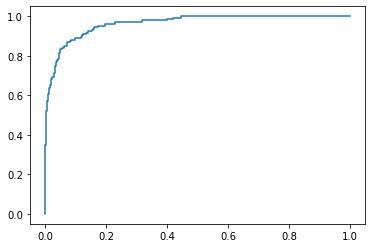

In [52]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# Print ROC curve
plt.plot(fpr, tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [53]:
feature_columns2 = list(ploan_processed.columns.difference(['Personal Loan', 'Experience', 'Mortgage']))
X2 = ploan_processed[feature_columns2]
y2 = ploan_processed['Personal Loan']

In [54]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(X2, y2, stratify=y, train_size=0.7, test_size=0.3, random_state=42)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


In [56]:
model2 = sm.Logit(train_y2, train_x2)
results2 = model2.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131098
         Iterations 9


In [57]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                  0.5854
Time:                        10:38:55   Log-Likelihood:                -458.84
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                2.569e-273
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0023      0.008      0.296      0.767      -0.013       0.017
CCAvg                  0.1280      0.046      2.774      0.006       0.038       0.218
CD Account             4.0025      0.401      9.983      0.000       3.217       4.788
CreditCard            -1.1504      0.252     -4.569      0.000      -1.644      -0.657
Education              1.6499      0.133     12.376      0.000       1.389       1.911
Family                 0.7021      0.088      7.942      0.000       0.529       0.875
Income                 0.0530      0.003     17.559      0.000       0.047       0.059
Online                -0.6932      0.187     -3.707      0.000      -1.060      -0.327
Securities Account    -1.1121      0.358     -3.106      0.002      -1.814      -0.410
const                -13.0585      0.760    -17.176      0.000     -14.549     -11.568
======================================================================================
"""

In [59]:
pred_y2 = results2.predict(test_x2)

In [60]:
pred_Y2 = cut_off(pred_y2, 0.5)
pred_Y2

4433    0
274     0
2439    0
1519    0
943     0
       ..
1284    0
1893    0
1649    0
2306    0
3384    0
Length: 1500, dtype: int64

In [61]:
cfmat2 = confusion_matrix(test_y2, pred_Y2)

acc(cfmat2)

0.9526666666666667

In [63]:
threshold = np.arange(0, 1, 0.1)
table2 = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y2 = cut_off(pred_y2, i)
    cfmat2 = confusion_matrix(test_y2, pred_Y2)
    table2.loc[i] = acc(cfmat2)
table2.index.name = 'threshold'
table2.columns.name = 'performance'
table2

performance,ACC
threshold,
0.0,0.096000
0.1,0.896000
0.2,0.934667
0.3,0.945333
0.4,0.950667
0.5,0.952667
0.6,0.952000
0.7,0.952000
0.8,0.942667


AUC: 0.9642791297935103


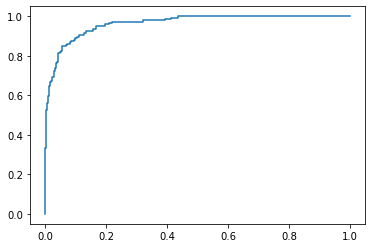

In [64]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y2, pred_y2, pos_label=1)

# Print ROC curve
plt.plot(fpr, tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

### 변수선택법

In [67]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [68]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=42)

In [69]:
 def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)]) # Modeling
    regr = model.fit() # 모델 학습
    AIC = regr.aic # 모델의 AIC
    return {"model" : regr, "AIC" : AIC}

'''
전진선택법
'''

def forward(X, y, predictors):
    # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors+[p]+['const']))
    # 데이터 프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료 시간
    print('Processed', models.shape[0], 'models on', len(predictors)+1, 'predictors in', (toc - tic))
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[0])
    return best_model

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodels_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]['model'].model.exog_names
        Fmodels_before = Fmodels.loc[i]['AIC']
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print('Total elapsed time:', (toc - tic), 'seconds.')
    
    return(Fmodels['model'][len(Fmodels['model'])])

'''
후진소거법
'''
def backward(X, y, predictors):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(predictors, len(predictors) - 1): # 각 변수 조합을 고려한 경우의 수
        results.append(processSubset(X=X, y=y, feature_set = list(combo)+['const']))
    models=pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index # AIC가 가장 낮은 모델
    toc = time.time() # 종료 시간
    print('Processed', models.shape[0], 'models on', len(predictors) - 1, 'predictors in', (toc - tic))
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:' ,best_model[0])
    return best_model

def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=['AIC', 'model'], index = range(1, len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X, y, predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y=train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors)-1] = Backward_result
        predictors = Bmodels.loc[len(predictors)-1]['model'].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [k for k in predictors if k != 'const']
        
    toc = time.time()
    print('Total elapsed time:', (toc - tic), 'Seconds.')
    return(Bmodels['model'].dropna().iloc[0])

'''
단계적선택법
'''
def Stepwise_model(X, y):
    Stepmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X, y, predictors + ['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors = predictors)
        if Backward_result['AIC']<Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']>Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]['AIC']
    toc = time.time()
    print('Total elapsed time:', (toc-tic), 'seconds.')
    return(Stepmodels['model'][len(Stepmodels['model'])])

In [70]:
Forward_best_model = forward_model(X=train_x, y=train_y)

Processed 11 models on 1 predictors in 0.03152608871459961
Selected predictors: ['Income', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7ff45d39a880>
Processed 10 models on 2 predictors in 0.016711950302124023
Selected predictors: ['Income', 'CD Account', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7ff45d39ac40>
Processed 9 models on 3 predictors in 0.016538143157958984
Selected predictors: ['Income', 'CD Account', 'Education', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7ff45d3662e0>
Processed 8 models on 4 predictors in 0.013546943664550781
Selected predictors: ['Income', 'CD Account', 'Education', 'Family', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7ff45d39a220>
Processed 7 models on 5 predictors in 0.009847164154052734
Selected predictors: ['Income', 'CD Account', 'Education', 'Family', 'CreditCard', 'const'

In [74]:
Backward_best_model = backward_model(X=train_x, y=train_y)

Processed 11 models on 10 predictors in 0.04062175750732422
Selected predictors: ['CCAvg', 'CD Account', 'CreditCard', 'Education', 'Experience', 'Family', 'Income', 'Mortgage', 'Online', 'Securities Account', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7ff45d380a30>
Processed 10 models on 9 predictors in 0.02505207061767578
Selected predictors: ['CCAvg', 'CD Account', 'CreditCard', 'Education', 'Family', 'Income', 'Mortgage', 'Online', 'Securities Account', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7ff45d39a370>
Processed 9 models on 8 predictors in 0.013788223266601562
Selected predictors: ['CCAvg', 'CD Account', 'CreditCard', 'Education', 'Family', 'Income', 'Online', 'Securities Account', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7ff45d39a280>
Total elapsed time: 0.09360718727111816 Seconds.


In [75]:
Stepwise_best_model = Stepwise_model(X=train_x, y=train_y)

Processed 11 models on 1 predictors in 0.01043701171875
Selected predictors: ['Income', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7ff45d2df9a0>
forward
Processed 1 models on 0 predictors in 0.0017070770263671875
Selected predictors: ['const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7ff45d283760>
Processed 10 models on 2 predictors in 0.011053800582885742
Selected predictors: ['Income', 'CD Account', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7ff45d39a580>
forward
Processed 2 models on 1 predictors in 0.0029649734497070312
Selected predictors: ['Income', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7ff45d3661f0>
Processed 9 models on 3 predictors in 0.01058506965637207
Selected predictors: ['Income', 'CD Account', 'Education', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7ff

In [76]:
# 모델에 의해 예측된/추정된 값 <=> test_y
pred_y_full = results.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [77]:
pred_Y_full = cut_off(pred_y_full, 0.5)
pred_Y_forward = cut_off(pred_y_forward, 0.5)
pred_Y_backward = cut_off(pred_y_backward, 0.5)
pred_Y_stepwise = cut_off(pred_y_stepwise, 0.5)

In [78]:
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_forward = confusion_matrix(test_y, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y, pred_Y_stepwise)

In [79]:
print(acc(cfmat_full))
print(acc(cfmat_forward))
print(acc(cfmat_backward))
print(acc(cfmat_stepwise))

0.9506666666666667
0.9346666666666666
0.9346666666666666
0.9346666666666666


In [80]:
print(len(results.model.exog_names))
print(len(Forward_best_model.model.exog_names))

12
10


AUC: 0.9639257620452311


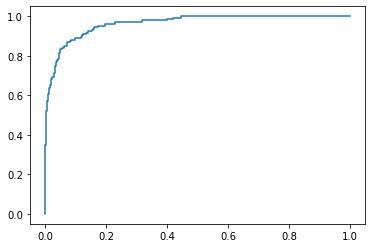

In [81]:
# sklearn ROC 패키지 제공
fpr ,tpr, thresholds = metrics.roc_curve(test_y, pred_y_full, pos_label=1)

# Print ROC curve
plt.plot(fpr, tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.9588403392330384


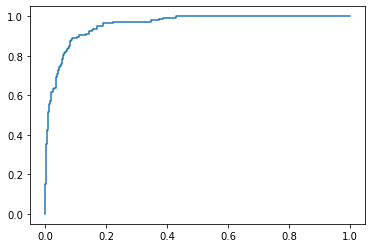

In [82]:
# sklearn ROC 패키지 제공
fpr ,tpr, thresholds = metrics.roc_curve(test_y, pred_y_forward, pos_label=1)

# Print ROC curve
plt.plot(fpr, tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.9588403392330384


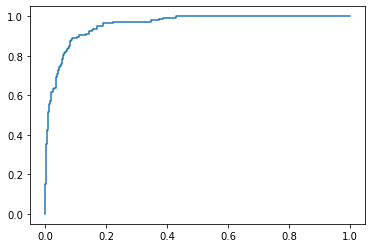

In [83]:
# sklearn ROC 패키지 제공
fpr ,tpr, thresholds = metrics.roc_curve(test_y, pred_y_backward, pos_label=1)

# Print ROC curve
plt.plot(fpr, tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.9588403392330384


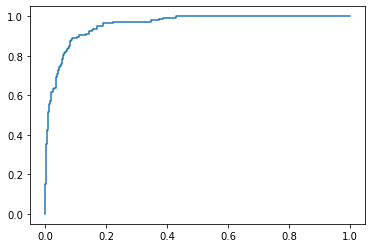

In [84]:

# sklearn ROC 패키지 제공
fpr ,tpr, thresholds = metrics.roc_curve(test_y, pred_y_stepwise, pos_label=1)

# Print ROC curve
plt.plot(fpr, tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

### Lasso & Ridge

In [85]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [87]:
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis=1, inplace=False)

feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=42)

In [89]:
# Lasso 적합
ll = Lasso(alpha=0.01) # alpha 는 lambda를 뜻함.
ll.fit(train_x, train_y) # 알파 값이 커지면 회귀계수가 0으로 간다.

Lasso(alpha=0.01)

In [92]:
# 회귀 계수 출력, 0은 5개가 나옴.
ll.coef_

array([ 0.        ,  0.00852166,  0.10237581, -0.        ,  0.06531086,
        0.        ,  0.02751606,  0.00315092,  0.00011978, -0.        ,
       -0.        ])

In [91]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                  0.5861
Time:                        10:48:19   Log-Likelihood:                -458.04
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                1.666e-271
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0511      0.072     -0.712      0.477      -0.192       0.090
CCAvg                  0.1332      0.046      2.872      0.004       0.042       0.224
CD Account             3.9878      0.402      9.920      0.000       3.200       4.776
CreditCard            -1.1483      0.252     -4.549      0.000      -1.643      -0.654
Education              1.6770      0.136     12.324      0.000       1.410       1.944
Experience             0.0532      0.071      0.746      0.456      -0.087       0.193
Family                 0.7001      0.088      7.925      0.000       0.527       0.873
Income                 0.0525      0.003     17.319      0.000       0.047       0.058
Mortgage               0.0007      0.001      1.039      0.299      -0.001       0.002
Online                -0.6926      0.187     -3.701      0.000      -1.059      -0.326
Securities Account    -1.1086      0.359     -3.089      0.002      -1.812      -0.405
const                -11.7709      1.921     -6.127      0.000     -15.536      -8.006
======================================================================================
"""

In [93]:
pred_y_lasso = ll.predict(test_x)
pred_Y_lasso = cut_off(pred_y_lasso, 0.5)
confusion_matrix(test_y, pred_Y_lasso)
print(acc(cfmat))

0.9333333333333333


AUC: 0.9610936987872829


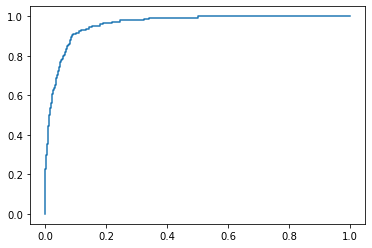

In [94]:
# sklearn ROC 패키지 제공
fpr ,tpr, thresholds = metrics.roc_curve(test_y, pred_y_lasso, pos_label=1)

# Print ROC curve
plt.plot(fpr, tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

- full 모델에 비해 약간 성능이 저하.

In [95]:
# ridge 함수 적합
rr = Ridge(alpha=0.01)
rr.fit(train_x, train_y)

Ridge(alpha=0.01)

In [99]:
rr.coef_ # 0에 수렴하지 않음

array([-5.68421121e-03,  1.28174392e-02,  3.40370401e-01, -4.78931120e-02,
        7.75710030e-02,  5.69711425e-03,  3.39642971e-02,  2.90460896e-03,
        8.23988625e-05, -2.18219570e-02, -6.50169017e-02])

In [98]:
ll.coef_ # 0에 수렴

array([ 0.        ,  0.00852166,  0.10237581, -0.        ,  0.06531086,
        0.        ,  0.02751606,  0.00315092,  0.00011978, -0.        ,
       -0.        ])

In [100]:
# ridge y 예측, confusion_matrix, acc 계산
pred_y_ridge = rr.predict(test_x)
pred_Y_ridge = cut_off(pred_y_ridge, 0.5)
confusion_matrix(test_y, pred_Y_ridge)
print(acc(cfmat))

0.9333333333333333


AUC: 0.959203949524746


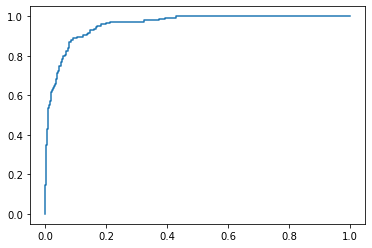

In [101]:
# sklearn ROC 패키지 제공
fpr ,tpr, thresholds = metrics.roc_curve(test_y, pred_y_ridge, pos_label=1)

# Print ROC curve
plt.plot(fpr, tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

- Ridge가 Lasso 보다 좋지 않은 성능을 보임.

In [105]:
# lambda 값에 따른 회귀 계수 / acc 계산
alpha = np.logspace(-3, 2, 6)

In [107]:
# lambda 값 0.001 ~ 10까지 범위 설정
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [108]:
data = []
acc_table = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    pred_y = lasso.predict(test_x) # full model
    pred_y = cut_off(pred_y, 0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append(acc(cfmat))
    
df_lasso = pd.DataFrame(data, index=alpha)
df_lasso
acc_table_lasso = pd.DataFrame(acc_table, index=alpha)

In [112]:
# 회귀계수와 예측성능
df_lasso.T

,0.001,0.010,0.100,1.000,10.000,100.000
0,-0.263402,-0.354451,-0.137111,-0.104780,0.096,0.096
1,-0.004102,0.000000,-0.000000,-0.000000,-0.000,-0.000
2,0.012342,0.008522,0.000000,0.000000,0.000,0.000
3,0.306188,0.102376,0.000000,0.000000,0.000,0.000
4,-0.037654,-0.000000,0.000000,0.000000,0.000,0.000
5,0.076248,0.065311,0.000000,0.000000,0.000,0.000
6,0.004111,0.000000,-0.000000,-0.000000,-0.000,-0.000
7,0.033232,0.027516,0.000000,0.000000,0.000,0.000
8,0.002941,0.003151,0.003060,0.002662,0.000,0.000
9,0.000088,0.000120,0.000130,0.000077,0.000,0.000


In [113]:
# acc
acc_table_lasso.T

,0.001,0.010,0.100,1.000,10.000,100.000
0,0.932667,0.925333,0.902667,0.904,0.904,0.904


### Ridge

In [114]:
data = []
acc_table = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
    pred_y = ridge.predict(test_x) # full model
    pred_y = cut_off(pred_y, 0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append(acc(cfmat))
    
df_ridge = pd.DataFrame(data, index=alpha)
df_ridge
acc_table_ridge = pd.DataFrame(acc_table, index=alpha)

In [116]:
df_ridge.T

,0.001,0.010,0.100,1.000,10.000,100.000
0,-0.218793,-0.218797,-0.218833,-0.219192,-0.222594,-0.245874
1,-0.005684,-0.005684,-0.005684,-0.005685,-0.005687,-0.005388
2,0.012817,0.012817,0.012819,0.012829,0.012929,0.013432
3,0.340392,0.340370,0.340150,0.337964,0.317616,0.200304
4,-0.047897,-0.047893,-0.047853,-0.047458,-0.043794,-0.023225
5,0.077571,0.077571,0.077572,0.077583,0.077663,0.076784
6,0.005697,0.005697,0.005697,0.005699,0.005706,0.005435
7,0.033964,0.033964,0.033965,0.033969,0.034004,0.033973
8,0.002905,0.002905,0.002905,0.002906,0.002922,0.003007
9,0.000082,0.000082,0.000082,0.000083,0.000086,0.000105


In [117]:
acc_table_ridge.T

,0.001,0.010,0.100,1.000,10.000,100.000
0,0.934,0.934,0.934667,0.934667,0.933333,0.930667


### lambda 값의 변화에 따른 회귀계수 축소 시각화

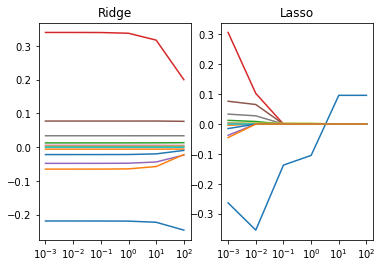

In [119]:
import matplotlib.pyplot as plt
ax1 = plt.subplot(121)
plt.semilogx(df_ridge)
plt.xticks(alpha)
plt.title('Ridge')

ax2 = plt.subplot(122)
plt.semilogx(df_lasso)
plt.xticks(alpha)
plt.title('Lasso')

plt.show()

- p 밸류가 높은 변수를 제거한 모델, 변수선택법을 통해 선택한 모델을 사용.
- Ridge와 Lasso를 쓰기에는 lambda값에 따라 변화가 너무 심함.
- 좋았다고 생각헀던 변수가 0으로 가버리는 현상 발생.
- 좋지않았다고 생각했던 변수가 0으로 가지않는 현상 발생.

    > 이에 따라, 원래 사용하던 Logistic Regression을 사용하는 것이 옳다.